<a href="https://colab.research.google.com/github/Milechwan/if1015/blob/master/ProjetoIF1015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import io

dataset = pd.read_csv(io.StringIO(uploaded['googleplaystore.csv'].decode("ISO-8859-1")))

In [2]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [0]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
#dataset[dataset['Reviews']=='3.0M']
#dataset[dataset['Reviews']=='3.0M'] = float(3000000)
#dataset[['Reviews']].apply(pd.to_numeric())
dataset.Reviews = pd.to_numeric(dataset.Reviews)

ValueError: ignored

In [14]:
dataset[dataset['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
dataset = dataset.drop(dataset[dataset['Price']=='Everyone'].index, axis = 0)
dataset.Reviews = pd.to_numeric(dataset.Reviews)

In [16]:
dataset.Price.describe()

count     9659
unique      92
top          0
freq      8905
Name: Price, dtype: object

Vendo que a coluna de preço é de tipo objeto, faz-se uma verificação de como estão os dados de aplicativos pagos, ou seja, os que não são classificados na coluna Type como Free, que são 0

In [17]:
dataset[dataset['Type']!='Free']['Price']

290       $4.99
291       $4.99
427       $3.99
478       $1.49
479       $2.99
480       $3.99
481       $7.99
571       $3.99
851       $3.99
854       $3.99
995       $4.99
1001      $2.99
1227      $3.49
1228      $4.99
1335      $3.99
1341      $2.99
1347      $2.99
1832      $1.99
1833      $4.99
1834      $4.99
1835      $4.99
1836      $5.99
1837      $6.99
1838      $9.99
1839      $4.99
2062      $3.99
2085      $2.99
2086      $3.99
2087      $2.99
2150      $3.99
          ...  
10453     $2.99
10457     $2.99
10459     $1.99
10460     $1.00
10517     $1.49
10531     $3.49
10540     $2.99
10570     $1.99
10583     $6.99
10586     $0.99
10594     $1.99
10645     $8.99
10650     $5.49
10651     $6.49
10661     $5.99
10662     $6.49
10664     $6.49
10668     $6.49
10669     $5.99
10674     $5.49
10675     $0.99
10679     $2.99
10682     $0.99
10690     $0.99
10697     $0.99
10735     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
10798     $1.04
Name: Price, Length: 755

In [18]:
dataset[['Current Ver']].describe()

,Current Ver
count,9651
unique,2818
top,Varies with device
freq,1054


In [19]:
dataset[['Last Updated']].describe()

,Last Updated
count,9659
unique,1377
top,"August 3, 2018"
freq,252


In [20]:
dataset[['Android Ver']].describe()

,Android Ver
count,9657
unique,33
top,4.1 and up
freq,2206


In [21]:
dataset.Category.describe()

count       9659
unique        33
top       FAMILY
freq        1906
Name: Category, dtype: object

In [0]:
dataset.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [0]:
dataset.columns[dataset.isna().any()].tolist()#quais colunas possuem valores NaN

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [0]:
dataset[dataset['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [0]:
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'])

In [23]:
dataset['Last Updated'].describe()

count                    9659
unique                   1377
top       2018-08-03 00:00:00
freq                      252
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [0]:
#visto que há somente 1 ocorrência de Type como NaN, faz-se a alteração sabendo pelo print acima que Price=0
dataset['Type'] = dataset['Type'].apply(lambda x: 'Free' if (x!='Free' and x!='Paid') else x)
dataset.Type.describe()

count     9660
unique       2
top       Free
freq      8904
Name: Type, dtype: object

In [0]:
dataset.Genres.describe()

count      8862
unique      114
top       Tools
freq        813
Name: Genres, dtype: object

In [0]:
dataset[dataset['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [0]:
dataset[dataset['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [0]:
dataset[dataset['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Transformando o tipo das colunas a seguir em categórico, de acordo com os resultados mostrados ao descrever cada uma delas** 

In [0]:
dataset['Type'] = dataset['Type'].astype("category")
dataset['Content Rating'] = dataset['Content Rating'].astype("category") 
dataset['Category'] = dataset['Category'].astype("category") 
dataset['Installs'] = dataset['Installs'].astype("category")
dataset['Android Ver'] = dataset['Android Ver'].astype("category")
dataset['Current Ver'] = dataset['Current Ver'].astype("category")
dataset['Size'] = dataset['Size'].astype("category")

In [40]:
dataset.dtypes


App                       object
Category                    int8
Rating                   float64
Reviews                    int64
Size                    category
Installs                    int8
Type                        int8
Price                    float64
Content Rating              int8
Last Updated      datetime64[ns]
Current Ver                int16
Android Ver                 int8
dtype: object

In [0]:
dataset['Type'] = dataset['Type'].cat.codes
dataset['Content Rating'] = dataset['Content Rating'].cat.codes
dataset['Category'] = dataset['Category'].cat.codes
dataset['Installs'] = dataset['Installs'].cat.codes
dataset['Android Ver'] = dataset['Android Ver'].cat.codes
dataset['Current Ver'] = dataset['Current Ver'].cat.codes
dataset['Size'] = dataset['Size'].cat.codes
#dataset.corr(method='spearman')
#dataset['App'] = dataset['App'].astype('str')
#dataset.dtypes

In [0]:
dataset['Type'].describe()

count    10840.000000
mean         0.073708
std          0.261661
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Type, dtype: float64

In [0]:
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

stats.mannwhitneyu(apps_free,apps_paid)

MannwhitneyuResult(statistic=3428972.5, pvalue=2.5377327648945917e-12)

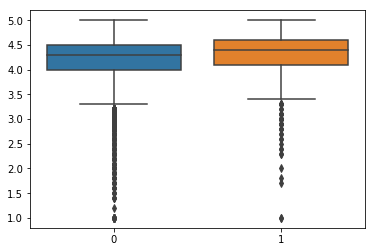

In [0]:
sb.boxplot(data=[apps_free,apps_paid])

In [4]:
dataset.columns[dataset.isna().any()].tolist()

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [0]:
dataset['Type'] = dataset['Type'].apply(lambda x: 0 if x==-1 else x)
dataset[dataset['Type']==-1]
#dataset.corr(method="spearman")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [0]:
#normalizando toda a base - talvez não seja necessário
datasetNorm = dataset[['Category','Type','Rating','Reviews','Installs','Content Rating']]
datasetNorm = datasetNorm-datasetNorm.mean()/datasetNorm.std()
datasetNorm.head()

,Category,Type,Rating,Reviews,Installs,Content Rating
0,-2.002245,-0.281695,0.953592,158.848296,9.999818e+03,-0.456081
1,-2.002245,-0.281695,0.753592,966.848296,4.999998e+05,-0.456081
2,-2.002245,-0.281695,1.553592,87509.848296,5.000000e+06,-0.456081
3,-2.002245,-0.281695,1.353592,215643.848296,5.000000e+07,2.543919
4,-2.002245,-0.281695,1.153592,966.848296,9.999982e+04,-0.456081


In [5]:
#dataset.drop_duplicates(subset=['App'],keep=False, inplace=True)
dataset.drop_duplicates(subset=['App'],keep='last', inplace=True)
print(len(dataset))

9660


In [0]:
dataset.corr(method='spearman')

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
Category,1.000000,-0.024757,0.053004,0.007241,0.015947,0.014985,-0.108551
Rating,-0.024757,1.000000,0.156490,0.014971,0.065266,0.064280,-0.013999
Reviews,0.053004,0.156490,1.000000,0.136829,-0.171667,-0.170549,0.180239
Installs,0.007241,0.014971,0.136829,1.000000,-0.061321,-0.061817,0.033303
Type,0.015947,0.065266,-0.171667,-0.061321,1.000000,0.999034,-0.047497
Price,0.014985,0.064280,-0.170549,-0.061817,0.999034,1.000000,-0.046909
Content Rating,-0.108551,-0.013999,0.180239,0.033303,-0.047497,-0.046909,1.000000


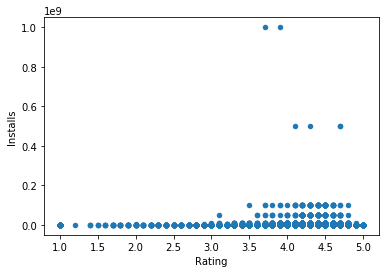

In [0]:
dataset.plot.scatter(x='Rating',y='Installs')

In [0]:
dataset.Size.describe()

count                   9660
unique                   462
top       Varies with device
freq                    1227
Name: Size, dtype: object

In [0]:
dataset.Installs.describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

**Para ver quão parecidas são essas colunas entre si, crio um dataframe contendo somente as duas colunas para saber a porcentagem de quantas entradas da coluna category são substring das entradas em genres**

In [6]:
copy_dataset = dataset[['Category','Genres']]
copy_dataset.head()

,Category,Genres
0,ART_AND_DESIGN,Art & Design
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
5,ART_AND_DESIGN,Art & Design


In [7]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x.lower())
copy_dataset['Genres'] = copy_dataset['Genres'].apply(lambda x: x.lower())
copy_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Category,Genres
0,art_and_design,art & design
2,art_and_design,art & design
3,art_and_design,art & design
4,art_and_design,art & design;creativity
5,art_and_design,art & design


**Logo abaixo faz-se a troca de \_and_ por &, para que as strings possam ser comparadas em seguida**

In [8]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x[:x.index('_')]+' & '+x[x.rindex('_')+1:] if x.find('_and_')>-1 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
copy_dataset['Category'].head()

0    art & design
2    art & design
3    art & design
4    art & design
5    art & design
Name: Category, dtype: object

In [9]:
copy_dataset['eql'] = copy_dataset.apply(lambda x: x[0] in x[1], axis=1)
copy_dataset.eql.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    True
2    True
3    True
4    True
5    True
Name: eql, dtype: bool

In [10]:
copy_dataset.eql.describe()

count     9660
unique       2
top       True
freq      6664
Name: eql, dtype: object

In [11]:
print(6664*100/9660)

68.98550724637681



A coluna criada acima com valores booleanos indica se a coluna Category está contida (ou é igual) à coluna Genres. Em porcentagem, vê-se que quase 69% das entradas estão contidas, o que possibilita a remoção da coluna Genres para uma interpretação mais prática dos dados.

In [24]:
dataset = dataset.drop('Genres', axis = 1)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,2017-03-26,1.0,2.3 and up


**Remoção do símbolo $ para transformar o tipo da coluna Price em numérico**

In [0]:
dataset['Price'] = dataset['Price'].apply(lambda x: x[x.find('$')+1:] if x.find('$')>-1 else x)
#dataset[dataset['Price_Temp']!='0'].head()

In [0]:
dataset['Price'] = pd.to_numeric(dataset['Price'])

In [27]:
dataset.Price.describe()

count    9659.000000
mean        1.097231
std        16.851618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

**Imputação de dados com KNN, visto que a coluna Ratings (nota de avaliação de um aplicativo) possui mais de 1400 entradas NaN**

In [42]:
from fancyimpute import KNN
dataset_knn = KNN(k=3).fit_transform(dataset[['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver']])


Imputing row 1/9659 with 0 missing, elapsed time: 16.073
Imputing row 101/9659 with 0 missing, elapsed time: 16.074
Imputing row 201/9659 with 0 missing, elapsed time: 16.075
Imputing row 301/9659 with 0 missing, elapsed time: 16.076
Imputing row 401/9659 with 0 missing, elapsed time: 16.077
Imputing row 501/9659 with 0 missing, elapsed time: 16.079
Imputing row 601/9659 with 0 missing, elapsed time: 16.080
Imputing row 701/9659 with 0 missing, elapsed time: 16.080
Imputing row 801/9659 with 0 missing, elapsed time: 16.081
Imputing row 901/9659 with 0 missing, elapsed time: 16.082
Imputing row 1001/9659 with 0 missing, elapsed time: 16.082
Imputing row 1101/9659 with 0 missing, elapsed time: 16.083
Imputing row 1201/9659 with 0 missing, elapsed time: 16.084
Imputing row 1301/9659 with 0 missing, elapsed time: 16.085
Imputing row 1401/9659 with 0 missing, elapsed time: 16.085
Imputing row 1501/9659 with 0 missing, elapsed time: 16.086
Imputing row 1601/9659 with 0 missing, elapsed time:

AttributeError: ignored